In [1]:
import PyMca5 as mca
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'png'

specdir = '/users/opid01/edo/inhouse_jan_17/spec/'

In [2]:
files = !ls {specdir} | grep spec | grep fast
for fname in files: print(fname)
rois = ['mpx4int']#, 'roi7', 'roi8', 'roi6']
sample_name = 'tbd'

align_fast_00006.spec
align_fast_00009.spec
samples_fast_00007.spec
samples_fast_00009.spec
samples_fast_00010.spec
samples_fast_00011.spec
samples_fast_00013.spec
samples_fast_00014.spec
samples_fast_00015.spec
samples_fast_00016.spec
samples_fast_00017.spec
samples_fast_00018.spec
samples_fast_00019.spec
samples_fast_00020.spec
samples_fast_00021.spec
samples_fast_00022.spec
samples_fast_00023.spec
samples_fast_00024.spec
samples_fast_00025.spec
samples_fast_00026.spec
samples_fast_00027.spec
samples_fast_00028.spec
samples_fast_00029.spec
samples_fast_00030.spec
samples_fast_00031.spec
samples_fast_00032.spec
samples_fast_00033.spec
samples_fast_00034.spec
samples_fast_00035.spec
samples_fast_00036.spec
samples_fast_00037.spec
samples_fast_00041.spec


In [3]:
sf = mca.specfile.Specfile(specdir+files[0])
print('n of scans is {0}'.format(int(sf.list()[2:])))

n of scans is 110


In [4]:
scan_no = 0
what2plot = 'mpx4int'

In [5]:
# get the scan
scan = sf[scan_no]
# get the data and the rois
data = scan.data()
index_list = scan.alllabels()
rawdata = data[index_list.index(what2plot)]
motor_1 = data[index_list.index('adcX')]
motor_2 = data[index_list.index('adcY')]
new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
# apply dimensions
rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape

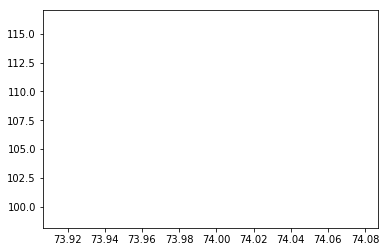

In [6]:
@interact(i=(0,int(sf.list()[2:])))
def pltk(i):
    # plt.pcolormesh(motor_1,motor_2,rawdata)
    scan = sf[i]
    # get the data and the rois
    data = scan.data()
    index_list = scan.alllabels()
    rawdata = data[index_list.index(what2plot)]
    motor_1 = data[index_list.index('adcX')]
    motor_2 = data[index_list.index('adcY')]
    new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
    # apply dimensions
    rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
    plt.pcolormesh(motor_2,motor_1,rawdata)
    plt.axis([motor_1.min(),motor_1.max(),motor_2.min(),motor_2.max()])


In [7]:
print 'n of scans is {0}'.format(sf.scanno())
n = 0
scan = sf[n]
data = scan.data()
# select index
index_list = scan.alllabels()
print index_list
what2plot = 'roi4'
# load data
rawdata = data[index_list.index(what2plot)] 
motor_1 = data[index_list.index('adcX')]
motor_2 = data[index_list.index('adcY')]
new_shape = (int(scan.command().split()[4]), int(scan.command().split()[8]))
# apply dimensions
rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
print 'rawdata and motor shapes: {0}'.format(new_shape)

SyntaxError: invalid syntax (<ipython-input-7-a00efb5b3a46>, line 1)

In [ ]:
fig = plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pcolormesh(motor_1, motor_2, rawdata, shading='gouraud')
plt.axis([motor_1.min(),motor_1.max(),motor_2.min(),motor_2.max()])
# plt.colorbar()
# plt.axes().set_aspect('equal')
# plt.show()
plt.subplot(1,2,2)
plt.pcolormesh(motor_1, motor_2, rawdata)
plt.axis([motor_1.min(),motor_1.max(),motor_2.min(),motor_2.max()])
# plt.colorbar()
# plt.axes().set_aspect('equal')
plt.tight_layout()
plt.show()